In [ ]:
import numpy as np
import pandas as pd

# Importing Data

In [ ]:
crop = pd.read_csv("crop.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,soiltexture,organicmatter,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,65,137,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,54,134,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,59,147,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,11,127,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,68,112,rice


In [ ]:
crop.shape

(2200, 10)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2193 non-null   float64
 6   rainfall       2200 non-null   float64
 7   soiltexture    2200 non-null   int64  
 8   organicmatter  2200 non-null   int64  
 9   label          2200 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 172.0+ KB


In [ ]:
crop.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               7
rainfall         0
soiltexture      0
organicmatter    0
label            0
dtype: int64

In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,soiltexture,organicmatter
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2193.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.471129,103.463655,40.476818,125.203636
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773308,54.958389,17.675242,14.825263
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,10.000000,100.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.972292,64.551686,25.000000,112.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.427727,94.867624,41.000000,125.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.924042,124.267508,55.000000,138.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,70.000000,150.000000


# Exploring Data

In [ ]:
numeric_crop = crop.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_crop.corr()

<Axes: >

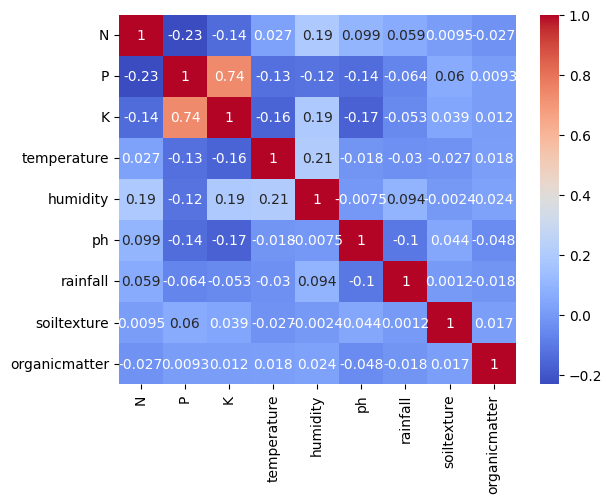

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [ ]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<ipython-input-46-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


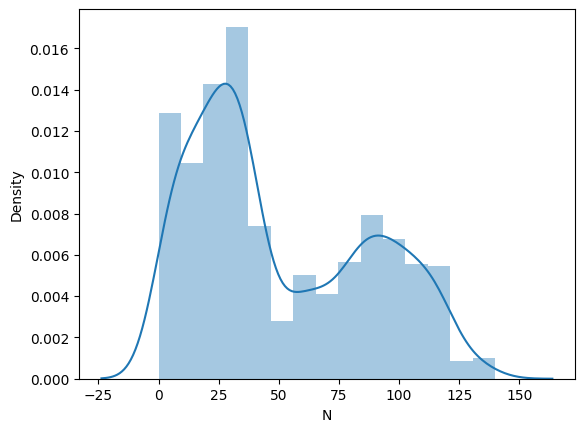

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

# Encoding

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [ ]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [ ]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,soiltexture,organicmatter,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,65,137,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,54,134,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,59,147,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,11,127,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,68,112,rice,1


# Train Test Split

In [ ]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [ ]:
from sklearn.impute import SimpleImputer
nm=SimpleImputer(strategy='mean')
X=nm.fit_transform(X)

In [ ]:
X

array([[ 90.       ,  42.       ,  43.       , ..., 202.9355362,
         65.       , 137.       ],
       [ 85.       ,  58.       ,  41.       , ..., 226.6555374,
         54.       , 134.       ],
       [ 60.       ,  55.       ,  44.       , ..., 263.9642476,
         59.       , 147.       ],
       ...,
       [118.       ,  33.       ,  30.       , ..., 173.3228386,
         55.       , 124.       ],
       [117.       ,  32.       ,  34.       , ..., 127.1752928,
         13.       , 150.       ],
       [104.       ,  18.       ,  30.       , ..., 140.9370415,
         10.       , 117.       ]])

In [ ]:
y.shape

(2200,)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

#X_train, X_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

In [ ]:
#X_train.shape

In [ ]:
#X_test.shape

In [ ]:
#X_train


# Scale the features using MinMaxScaler

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib

# Example data (replace with your actual dataset)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MinMaxScaler
ms = MinMaxScaler()

# Fit the scaler on the training data
ms.fit(X_train)

# Transform the training data
X_train_scaled = ms.transform(X_train)

# Transform the test data
X_test_scaled = ms.transform(X_test)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

# Save the fitted scaler and trained model
joblib.dump(ms, 'minmaxscaler.pkl')
joblib.dump(model, 'model.pkl')

print("Scaler and model saved successfully!")


Scaler and model saved successfully!


In [ ]:
X_train

array([[ 17.        ,  16.        ,  14.        , ..., 102.944161  ,
         70.        , 117.        ],
       [ 37.        ,  79.        ,  19.        , ...,  69.40878198,
         35.        , 113.        ],
       [  7.        ,  73.        ,  25.        , ...,  45.20841071,
         35.        , 124.        ],
       ...,
       [ 11.        ,  36.        ,  31.        , ..., 100.2585673 ,
         53.        , 121.        ],
       [ 11.        , 124.        , 204.        , ...,  71.40043037,
         24.        , 105.        ],
       [ 32.        ,  78.        ,  22.        , ...,  53.40906048,
         56.        , 141.        ]])

# Standarization

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data and labels
# Fit and save the scalers
sc = StandardScaler()
ms = MinMaxScaler()

X_train_scaled = sc.fit_transform(X_train)
X_train_scaled_minmax = ms.fit_transform(X_train_scaled)

# Save the scalers
joblib.dump(sc, 'standscaler.pkl')
joblib.dump(ms, 'minmaxscaler.pkl')

# Train your model
model = RandomForestClassifier()
model.fit(X_train_scaled_minmax, y_train)

# Save the model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [ ]:
X_train

array([[ 17.        ,  16.        ,  14.        , ..., 102.944161  ,
         70.        , 117.        ],
       [ 37.        ,  79.        ,  19.        , ...,  69.40878198,
         35.        , 113.        ],
       [  7.        ,  73.        ,  25.        , ...,  45.20841071,
         35.        , 124.        ],
       ...,
       [ 11.        ,  36.        ,  31.        , ..., 100.2585673 ,
         53.        , 121.        ],
       [ 11.        , 124.        , 204.        , ...,  71.40043037,
         24.        , 105.        ],
       [ 32.        ,  78.        ,  22.        , ...,  53.40906048,
         56.        , 141.        ]])

# Training Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9522727272727273
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9545454545454546
K-Nearest Neighbors  with accuracy : 0.9477272727272728
Decision Tree  with accuracy : 0.9886363636363636
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9886363636363636
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.8431818181818181


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
tree_clf = DecisionTreeRegressor(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

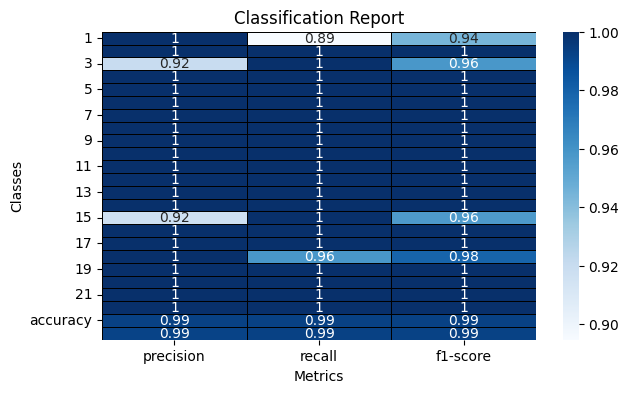

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
report=classification_report(y_test,ypred,output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Step 3: Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', linecolor='black', linewidths=0.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

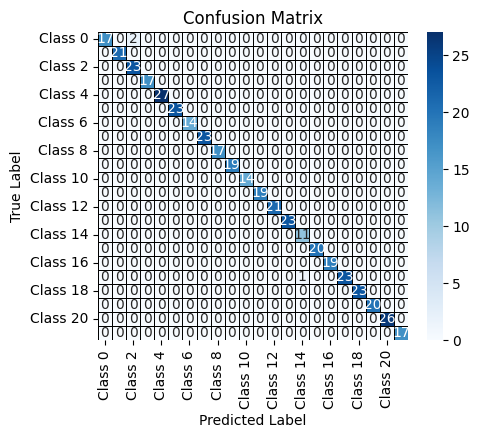

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Generate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred)

# Automatically generate class names based on the number of classes
num_classes = len(set(y_test))  # or len(set(ypred)), assuming y_test and ypred have the same classes
class_names = [f"Class {i}" for i in range(num_classes)]

# Step 2: Create a DataFrame for better labeling
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Step 3: Plot the heatmap
plt.figure(figsize=(5, 4))  # Adjusted size for better visibility with more classes
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', linecolor='black', linewidths=0.5)

# Set plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Predictive System

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal,soiltexture,organicmatter):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal,soiltexture,organicmatter]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:
N = 17
P = 16
k = 14
temperature = 16.39
humidity = 92.18
ph = 6.62
rainfall = 102.94
soiltexture = 65
organicmatter =120

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall,soiltexture,organicmatter)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Muskmelon is a best crop to be cultivated 


In [ ]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [ ]:
print(X_train)

[[ 17.          16.          14.         ... 102.944161    70.
  117.        ]
 [ 37.          79.          19.         ...  69.40878198  35.
  113.        ]
 [  7.          73.          25.         ...  45.20841071  35.
  124.        ]
 ...
 [ 11.          36.          31.         ... 100.2585673   53.
  121.        ]
 [ 11.         124.         204.         ...  71.40043037  24.
  105.        ]
 [ 32.          78.          22.         ...  53.40906048  56.
  141.        ]]


In [ ]:
print(y_train)

1656     7
752     16
892     15
1041    13
1179    12
        ..
1638     7
1095    13
1130    12
1294    11
860     15
Name: crop_num, Length: 1760, dtype: int64
